In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

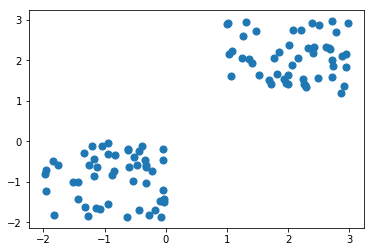

In [2]:
X= -2 * np.random.rand(100,2)
X1 = 1 + 2 * np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

In [3]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
Kmean.cluster_centers_

array([[ 2.09827808,  2.0767131 ],
       [-0.83696595, -0.89445261]])

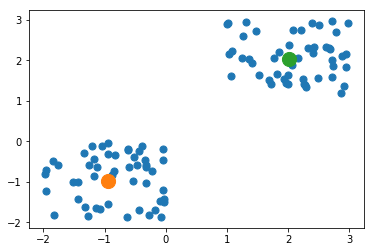

In [5]:
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(-0.94665068, -0.97138368, s=200)
plt.scatter(2.01559419, 2.02597093, s=200)
plt.show()


In [6]:
Kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([1])

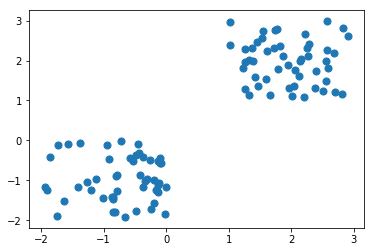

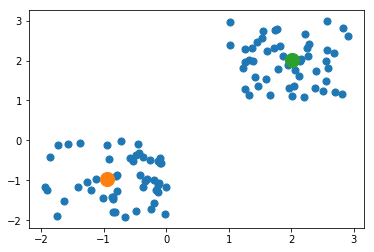

array([0])

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
X= -2 * np.random.rand(100,2)
#print(X)
X1 = 1 + 2 * np.random.rand(50,2)
#print(X1)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)
Kmean.cluster_centers_
plt.scatter(X[ : , 0], X[ : , 1], s =50)
plt.scatter(-0.94665068, -0.97138368, s=200)
plt.scatter(2.01559419, 2.02597093, s=200)
plt.show()
Kmean.labels_
sample_test=np.array([-3.0,-3.0])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

## Another k-Means example of python with scretching

Iterations: 5


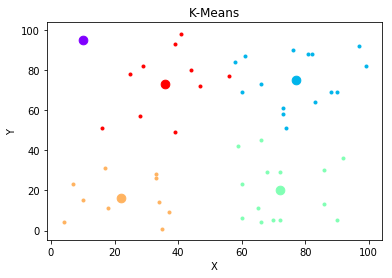

In [19]:
import numpy as np
import operator
import matplotlib.pyplot as plt
import matplotlib.cm as cm

r = lambda: np.random.randint(1, 100)

class Centroid:
    """
    pos    = [x, y] coordinate array
    points = points assigned to centroid
    """
    def __init__(self, pos):
        self.pos = pos
        self.points = []
        self.previous_points = []
        self.color = None

class KMeans:
    """
    Unsupervised clustering algortihm.
    """
    def __init__(self, n_centroids=5):
        self.n_centroids = n_centroids
        self.centroids = []

        # generate initial centroids
        for _ in range(n_centroids):
            self.centroids.append(Centroid(np.array([r(), r()])))
        
        # assign a color to each centroid
        colors = cm.rainbow(np.linspace(0, 1, len(self.centroids)))
        for i, c in enumerate(self.centroids):
            c.color = colors[i]

    def sample_data(self, samples=50):
        """
        Generates sample data assings to self.X
        """
        self.X = [[r(), r()] for _ in range(samples)]

    def fit(self):
        """
        Fits points in self.X
        Assigns points to centroids.
        Calls to update centroid mean to reflect mean of assigned points.
        """
        self.n_iters = 0
        fit = False 
        while not fit:
            for point in self.X:
                closest = self.assign_centroid(point)
                closest.points.append(point)

            # if length of array of centroids that did not change == number of centroids
            if len([c for c in self.centroids if c.points == c.previous_points]) == self.n_centroids:
                fit = True
                self._update_centroids(reset=False)
            else:
                self._update_centroids()

            self.n_iters += 1


    def assign_centroid(self, x):
        """
        Returns centroid closest to point.
        """
        distances = {}
        for centroid in self.centroids:
            distances[centroid] = np.linalg.norm(centroid.pos - x)
        closest = min(distances.items(), key=operator.itemgetter(1))[0]
        return closest


    def _update_centroids(self, reset=True):
        """
        Updates centroid position based on mean of assigned points.
        """
        for centroid in self.centroids:
            centroid.previous_points = centroid.points
            x_cor = [x[0] for x in centroid.points]
            y_cor = [y[1] for y in centroid.points]
            try:
                centroid.pos[0] = sum(x_cor)/len(x_cor)
                centroid.pos[1] = sum(y_cor)/len(y_cor)
            except:
                pass

            if reset:
                centroid.points = []
        
    def show(self):
        """
        Displays clustering, saves plot to {title}.png.
        """

        for i, c in enumerate(self.centroids):
            plt.scatter(c.pos[0], c.pos[1], marker='o', color=c.color, s=75)
            x_cors = [x[0] for x in c.points]
            y_cors = [y[1] for y in c.points]
            plt.scatter(x_cors, y_cors, marker='.', color=c.color)

        title = 'K-Means'
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(title)
        plt.savefig('{}.png'.format(title))
        plt.show()



if __name__ == '__main__':
    kmeans = KMeans(n_centroids=5)
    kmeans.sample_data()
    kmeans.fit()
    print('Iterations: {0}'.format(kmeans.n_iters))
    kmeans.show()